<a href="https://colab.research.google.com/github/bharathdev329/ICT-DSA/blob/main/Daily_Task_UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#

In [53]:
d=pd.read_csv('/content/fish.csv')
df=pd.DataFrame(d)
df.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [54]:
df = df.rename(columns={'Bream': 'Species'})

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  84 non-null     object 
 1   242.0    84 non-null     float64
 2   23.2     84 non-null     float64
 3   25.4     84 non-null     float64
 4   30.0     84 non-null     float64
 5   38.4     84 non-null     float64
 6   13.4     84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [56]:
df.isna().sum()

,0
Species,0
242.0,0
23.2,0
25.4,0
30.0,0
38.4,0
13.4,0


In [57]:

unique_bream_values = df['Species'].unique()
print(unique_bream_values)


['Bream' 'Roach' 'Smelt' 'Pike']


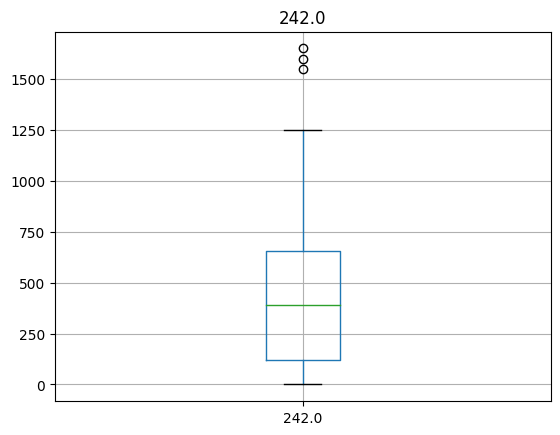

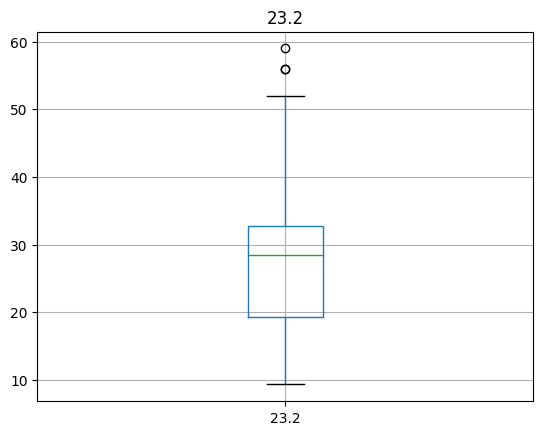

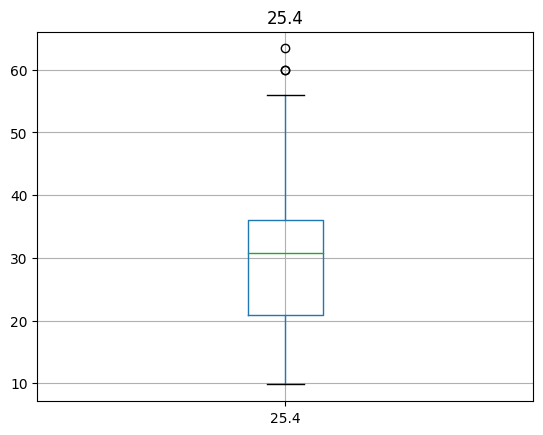

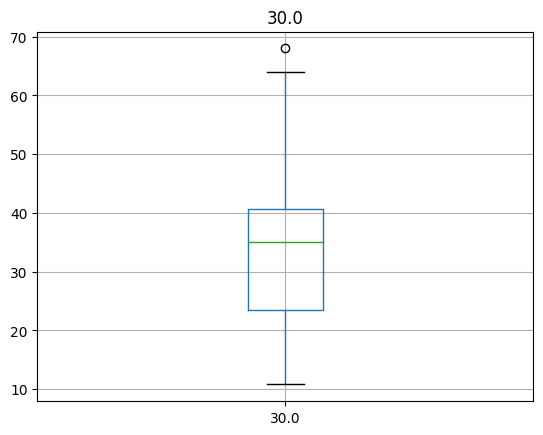

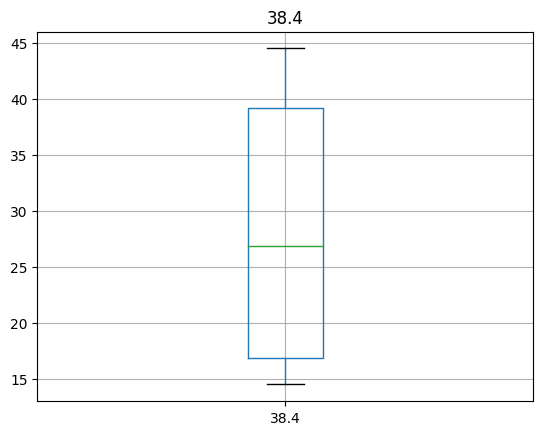

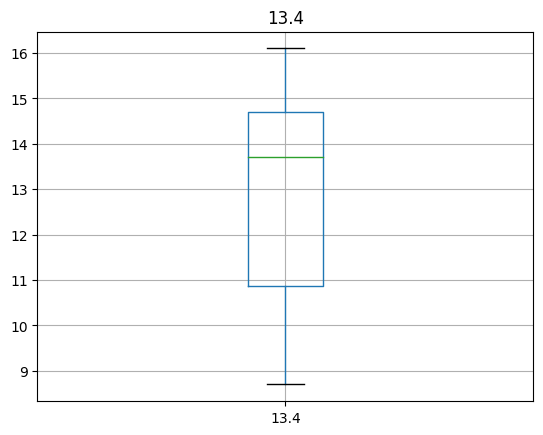

In [58]:
for column in df.select_dtypes(include=['number']):
  if column != 'Species':
    plt.figure()
    df.boxplot([column])
    plt.title(column)

In [59]:
outlier_col=[]
for column in df.select_dtypes(include=['number']):
  if column != 'Species':
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    count=outliers.shape[0]

    if count>0:
        outlier_col.append(column)
print(outlier_col)

Number of outliers in 242.0: 3
Number of outliers in 23.2: 3
Number of outliers in 25.4: 3
Number of outliers in 30.0: 1
Number of outliers in 38.4: 0
Number of outliers in 13.4: 0
['242.0', '23.2', '25.4', '30.0']


In [60]:
for column in outlier_col:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df[column]=df[column].clip(lower=lower_bound,upper=upper_bound)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[df.select_dtypes(include=['number']).columns]=scaler.fit_transform(df[df.select_dtypes(include=['number']).columns])


In [62]:
df.head()

,Species,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,-0.380263,-0.296988,-0.269256,-0.147434,1.170768,0.444320
1,Bream,-0.243627,-0.306157,-0.252510,-0.155043,1.151330,1.058494
2,Bream,-0.180774,-0.086097,-0.043186,0.027571,0.976392,0.208099
3,Bream,0.002318,-0.067759,-0.043186,0.065616,0.840329,1.058494
4,Bream,0.056972,-0.040252,0.015425,0.118878,1.093017,0.633297


In [63]:
# Extract the weight and length1 features using integer indices
X = df[['242.0', '23.2']]  # Assuming weight is in column 0 and length1 is in column 1

In [64]:
# K-means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Determine the optimal number of clusters using the Elbow method and Silhouette score
inertia = []
silhouette_scores = []
for i in range(2, 11):  # Check for 2 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

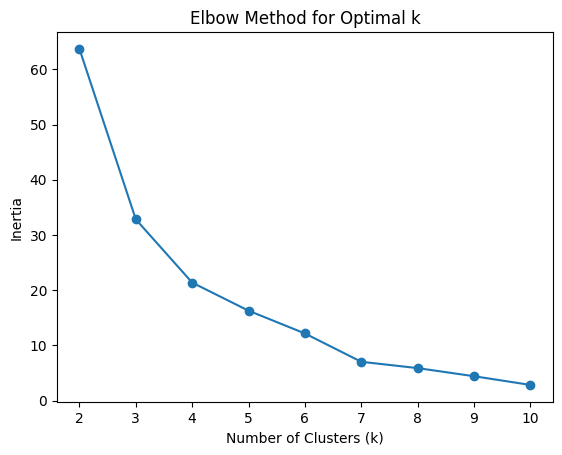

In [65]:
# Plot the Elbow method graph
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [66]:
# Find the optimal k using the Elbow method and Silhouette score
optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2


In [67]:
# Perform K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)

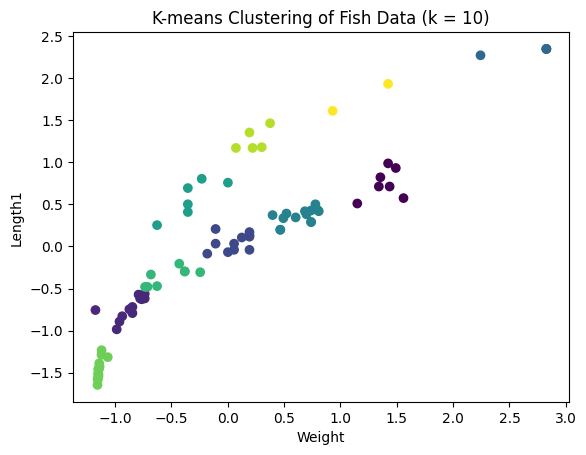

In [68]:
# prompt: Plot the K-means clusters

import matplotlib.pyplot as plt
# Plot the K-means clusters
plt.scatter(X['242.0'], X['23.2'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.title('K-means Clustering of Fish Data (k = {})'.format(optimal_k))
plt.show()


In [69]:
# Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering with the optimal k
agglomerative = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agglomerative.fit(X)

AgglomerativeClustering(n_clusters=10)

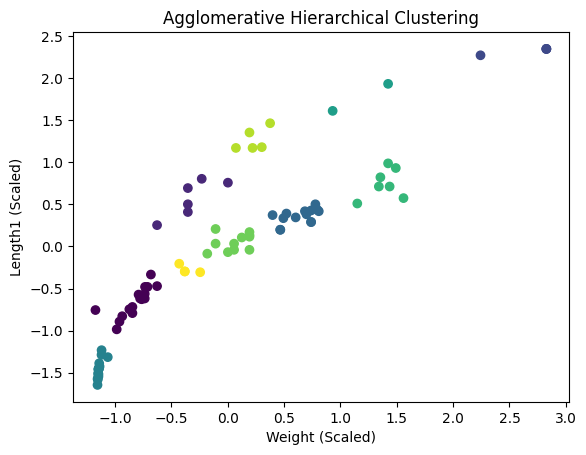

In [70]:
# Plot the hierarchical clusters
plt.scatter(X['242.0'], X['23.2'], c=agglomerative.labels_)
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Weight (Scaled)')
plt.ylabel('Length1 (Scaled)')
plt.show()